# Предварительный анализ данных
Первым этапом проводится предварительная обработка данных, как в первой лабораторной работе.

In [ ]:
import pandas as pd

In [ ]:
url = "/content/drive/MyDrive/3cancer.csv"
df = pd.read_csv(url,encoding = "utf-8",sep=",")
df.head(5)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

Из набора данных удаляются строки с пустыми значениями и дубликаты. Скрытых дубликатов в наборе не может быть, так как столбцы имеют числовое значение.

In [ ]:
print(df.isna().sum())

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64


In [ ]:
df = df.drop_duplicates()

Столбец с значением голых ядер имеет тип object, поэтому его тип изменяется на int, предварительно выполнив метод to_numeric с значением "coerce" параметра "errors", чтобы заменить некорректные значения на NaN и удалить их при помощи метода dropna.

In [ ]:
df["bare_nucleoli"] = pd.to_numeric(df["bare_nucleoli"], errors="coerce")
df = df.dropna(subset= ["bare_nucleoli"])
df["bare_nucleoli"] = df["bare_nucleoli"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 675 non-null    int64
 1   clump_thickness    675 non-null    int64
 2   size_uniformity    675 non-null    int64
 3   shape_uniformity   675 non-null    int64
 4   marginal_adhesion  675 non-null    int64
 5   epithelial_size    675 non-null    int64
 6   bare_nucleoli      675 non-null    int64
 7   bland_chromatin    675 non-null    int64
 8   normal_nucleoli    675 non-null    int64
 9   mitoses            675 non-null    int64
 10  class              675 non-null    int64
dtypes: int64(11)
memory usage: 63.3 KB


# Разработка предсказательной модели

Вторым этапом выполняется создание предсказательных моделей, для этого сначала выполняется стандартизация набора данных с помощью импортируемого метода StandardScaler библиотеки sklearn. Так же выделяется целевой признак, в данном наборе это столбец class, указывающий злокачественная или доброкачественная опухоль. Так как это столбец принимает значения 2 и 4, приведем их к виду 0 и 1 для дальнейшего обучения предсказательных моделей.

In [ ]:
from sklearn.preprocessing import StandardScaler

y = df["class"].sub(2).div(2)

scaler = StandardScaler()
scaler.fit(df.drop(columns= ["id", "class"]))
df_sc = scaler.transform(df.drop(columns= ["id", "class"]))
df_sc = pd.DataFrame(df_sc)
df_sc.head(10)

,0,1,2,3,4,5,6,7,8
0,0.194464,-0.703193,-0.742647,-0.643363,-0.557185,-0.698117,-0.180648,-0.615645,-0.349142
1,0.194464,0.279530,0.265978,0.748529,1.708477,1.777692,-0.180648,-0.289203,-0.349142
2,-0.515066,-0.703193,-0.742647,-0.643363,-0.557185,-0.423027,-0.180648,-0.615645,-0.349142
3,0.549228,1.589828,1.610811,-0.643363,-0.104053,0.127153,-0.180648,1.343005,-0.349142
4,-0.160301,-0.703193,-0.742647,0.052583,-0.557185,-0.698117,-0.180648,-0.615645,-0.349142
5,1.258758,2.244977,2.283228,1.792448,1.708477,1.777692,2.266259,1.343005,-0.349142
6,-1.224595,-0.703193,-0.742647,-0.643363,-0.557185,1.777692,-0.180648,-0.615645,-0.349142
7,-0.869831,-0.703193,-0.406439,-0.643363,-0.557185,-0.698117,-0.180648,-0.615645,-0.349142
8,-0.869831,-0.703193,-0.742647,-0.643363,-0.557185,-0.698117,-0.996284,-0.615645,1.950084
9,-0.160301,-0.375619,-0.742647,-0.643363,-0.557185,-0.698117,-0.588466,-0.615645,-0.349142


Разделяем набор данных на обучающую и тестовую выборку с помощью метода train_test_split. Тестовая выборка составит 20% от всего набора данных

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_sc, y, test_size = 0.2)

Сторим модель предсказания методом k-ближайших соседей с помощью метода KNeighborsClassifier, которую обучаем при помощи метода fit на обучающем наборе данных, передавая их в качестве параметра. Затем получаем предсказания с помощью построенной модели методом predict передавая тестовый набор в качестве параметра. Значения параметра количества ближайших соседей передано 25, это значение было выбрано в ходе нескольких тестов, перепробовав значения от 5 до 40 с шагом в 5.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kneighbors_model = KNeighborsClassifier(n_neighbors=20)
kneighbors_model.fit(x_train, y_train)
kneighbors_predicts = kneighbors_model.predict(x_test)

Сторим модель предсказания методом случайного леса с помощью метода RandomForestClassifier, которую обучаем при помощи метода fit на обучающем наборе данных, передавая их в качестве параметра. Затем получаем предсказания с помощью построенной модели методом predict передавая тестовый набор в качестве параметра. Значения параметра количества слуайных деревьев передано 100, это значение было выбрано в ходе нескольких тестов, перепробовав значения от 80 до 120 с шагом в 5.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tree_model = RandomForestClassifier(n_estimators=100)
tree_model.fit(x_train, y_train)
tree_predicts = tree_model.predict(x_test)

Сторим модель предсказания методом логистической регрессии с помощью метода LogisticRegression, которую обучаем при помощи метода fit на обучающем наборе данных, передавая их в качестве параметра. Затем получаем предсказания с помощью построенной модели методом predict передавая тестовый набор в качестве параметра.

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_predicts = logistic_model.predict(x_test)

Затем для полученных моделей высчитываются метрики: доля правильных ответов - методом accuracy_score, точность - precision_score, полнота - recall_score, f1_score, матрица ошибок - confusion_matrix.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def test_model(predicts, model, label_name):
    print(label_name)
    print("Accuracy - ", accuracy_score(y_test, predicts))
    print("Precision - ", precision_score(y_test, predicts))
    print("Recall - ", recall_score(y_test, predicts))
    print("F1-metric - ", f1_score(y_test, predicts))
    print("Confusion matrix - \n", confusion_matrix(y_test, predicts))

test_model(kneighbors_predicts, kneighbors_model, "K-nearest")
test_model(tree_predicts, tree_model, "Random Tree")
test_model(logistic_predicts, logistic_model, "Logistic")

K-nearest
Accuracy -  0.9777777777777777
Precision -  0.926829268292683
Recall -  1.0
F1-metric -  0.9620253164556963
Confusion matrix - 
 [[94  3]
 [ 0 38]]
Random Tree
Accuracy -  0.9777777777777777
Precision -  0.926829268292683
Recall -  1.0
F1-metric -  0.9620253164556963
Confusion matrix - 
 [[94  3]
 [ 0 38]]
Logistic
Accuracy -  0.9851851851851852
Precision -  0.95
Recall -  1.0
F1-metric -  0.9743589743589743
Confusion matrix - 
 [[95  2]
 [ 0 38]]


Из выведенных данных видно, что модель случайных деревьев справляется с предсказанием чуть лучше остальных моделей. При этом все три модели имеют значение больше 0.9, что говорит о хорошей точности предсказаний этих моделей.

Затем вычисляется метрика ROC-кривая для моделей с помощью метода roc_curve, в качестве параметра передается тестовый набор ответов и вектор вероятностей правильных предсказаний модели. Затем полученная кривая выводится на график для визуализации.

<function matplotlib.pyplot.show(*args, **kw)>

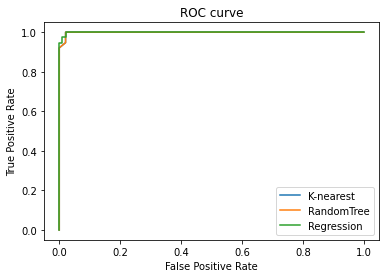

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr_K, tpr_K, thresholds_K = roc_curve(y_test, kneighbors_model.predict_proba(x_test)[:,1], pos_label=1)
fpr_T, tpr_T, thresholds_T = roc_curve(y_test, tree_model.predict_proba(x_test)[:,1], pos_label=1)
fpr_L, tpr_L, thresholds_L = roc_curve(y_test, logistic_model.predict_proba(x_test)[:,1], pos_label=1)
plt.plot(fpr_K, tpr_K,label = "K-nearest")
plt.plot(fpr_T, tpr_T,label = "RandomTree")
plt.plot(fpr_L, tpr_L,label = "Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.show

Из графика видно, что все модели имеют достаточно хорошую точность предсказаний. Это может быть связано с небольшим размером набора данных и сильной связью между признаками и целевым показателем.

В результате работы было создано три модели предсказания: методом k-ближайших соседей, методом случайных деревьев и методом логистической регрессии. Все три модели имеют хорошее качество предсказания, так как у всех вероятность правильного предсказания была выше 90%. Это говорит о том, что эти методы хорошо подходят для задачи предсказания качества опухоли, по тем признакам, что указаны в наборе данных.

# Дополнительное задание
Проверяем сбалансированность наших данных, подсчитывая количество записей для каждого класса по целевому признаку с помощью метода value_counts.

In [ ]:
v_c = df["class"].value_counts()
v_c

2    439
4    236
Name: class, dtype: int64

Из выведенных результатов видно, что набор данных не сбалансирован и данных для доброкачественных опухолей примерно в два раза больше, чем для злокачественных.

Чтобы сбалансировать данные, продублируем записи с злокачественными опухолями. Для этого выделим из набора данных выборку только с злокачественными опухолями, затем продублируем эту выборку необходимое количество раз с помощью метода repeat. Так как этот метод дублирует данные четное количество раз, добавим к этому набору недостающие количество записей. Получив набор данных с злокаественными опухолями равный набору с доброкачественными, перемешаем их между собой.

In [ ]:
k = v_c[2]-v_c[4]
df_1 = df.loc[df["class"] == 4]
df_1_n = df_1.loc[df_1.index.repeat(v_c[2]/v_c[4])]
df_1_k = pd.concat([df_1[0:k], df_1_n]).sample(frac=1)
df_b = pd.concat([df.loc[df['class']==2], df_1_k]).sample(frac=1)
df_b["class"].value_counts()

4    439
2    439
Name: class, dtype: int64